In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
#Parameters are extracted from NVIDIA daily stock prices
S = 487.16
alpha = 0.000476237
sigma = 0.03848375542
T = 252
n = 252
dt = T/n
xi = 0.006895311537
k = 0.0000959964
theta = 0.001480999432
rho = -0.1872180589
r = 0.042/252  
m = 10

In [3]:
def stock_price(S, alpha, sigma, T, n, dt):
    St_values = np.zeros((n + 1, m))
    Zt_values = np.zeros((n + 1, m))
    
    for j in range(m):
        t = np.linspace(0, T, n+1)
        Vt = np.zeros(n+1)
        Vt[0] = sigma**2
        St = np.zeros(n+1)
        St[0] = S
        Zt = np.zeros(n+1)
        Zt[0] = 1
        e1 = np.random.normal(0, 1, n+1)
        e2 = np.random.normal(0, 1, n+1)
        dw_v= np.zeros(n+1)
    
        for i in range(1, n+1):
            dw_v[i] = rho*e1[i] + np.sqrt(1-rho)*e2[i]
            Vt[i] = Vt[i-1]*np.exp(((k*(theta-Vt[i-1])/Vt[i-1])-0.5*xi**2)*dt + xi*dw_v[i])
            St[i] = St[i-1]*np.exp((alpha-0.5*Vt[i])*dt+(Vt[i]**0.5)*e1[i]*dt)
            Zt[i] = Zt[i-1]*np.exp(-((alpha-r)/(Vt[i]**0.5))*e2[i]*dt-0.5*(((alpha-r)/(Vt[i]**0.5))**2)*dt)

        St_values[:, j] = St
        Zt_values[:, j] = Zt

    return St_values, Zt_values

St_values, Zt_values = stock_price(S, alpha, sigma, T, n, dt)

In [4]:
columns = [f"Path_{i+1}" for i in range(m)]
index = [f"{i}" for i in range(n + 1)]

df_St = pd.DataFrame(St_values, columns=columns, index=index)
df_Zt = pd.DataFrame(Zt_values, columns=columns, index=index)

We can model stock prices over time under a stochastic price and volatility measure with Heston model

In [5]:
df_St

,Path_1,Path_2,Path_3,Path_4,Path_5,Path_6,Path_7,Path_8,Path_9,Path_10
0,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000
1,502.788216,514.093250,475.623627,488.446859,514.342063,444.061102,506.314004,481.166554,516.436716,469.833158
2,483.289293,508.693878,490.807435,476.796376,545.164270,479.452873,510.406555,471.915683,526.767786,448.633373
3,464.874634,507.256863,504.917648,451.104350,546.850364,458.822262,501.203522,457.184242,525.947918,435.268893
4,456.522360,524.567334,488.195541,431.772659,563.548778,446.294009,489.891299,473.105655,532.858176,433.631499
...,...,...,...,...,...,...,...,...,...,...
248,918.456879,411.820936,844.207200,250.631934,343.541748,416.783155,526.551345,160.465713,259.739454,179.389053
249,863.647111,423.887409,891.686534,246.432943,349.763792,399.651523,525.272602,169.794969,261.057496,172.871403
250,882.931721,422.811607,873.367342,244.317748,379.716508,424.527618,524.672027,163.447821,276.230640,177.270933
251,830.849740,412.896257,925.451802,246.916274,359.429924,450.299061,517.687267,168.167531,266.935745,182.753937


Under a Stochastic Heston Model, there exist a value of Z which could be used to transform market risk into risk neutral, which commonly used to value derivatives

In [6]:
df_Zt

,Path_1,Path_2,Path_3,Path_4,Path_5,Path_6,Path_7,Path_8,Path_9,Path_10
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990472,0.994551,1.004673,0.998573,0.996104,0.994010,0.997691,0.998339,0.996638,1.004273
2,0.988398,0.999924,1.001072,0.997980,0.997462,1.004410,0.993633,0.995331,0.987140,1.001182
3,0.979083,0.990045,0.989744,1.014871,0.996931,1.024246,1.000787,1.003165,0.985137,1.008922
4,0.977231,0.983179,0.983914,1.005880,0.993232,1.018765,0.993887,1.004913,0.982581,0.990526
...,...,...,...,...,...,...,...,...,...,...
248,0.932592,1.216210,1.076438,1.020936,0.819214,0.893615,1.093724,0.937581,0.935746,1.292426
249,0.934224,1.196766,1.078820,1.010513,0.818981,0.893905,1.082153,0.937357,0.942872,1.282821
250,0.931784,1.188744,1.079744,1.002475,0.828014,0.880789,1.089887,0.946169,0.947680,1.284753
251,0.934787,1.189270,1.094712,1.001362,0.818384,0.897850,1.093873,0.942411,0.940090,1.268993


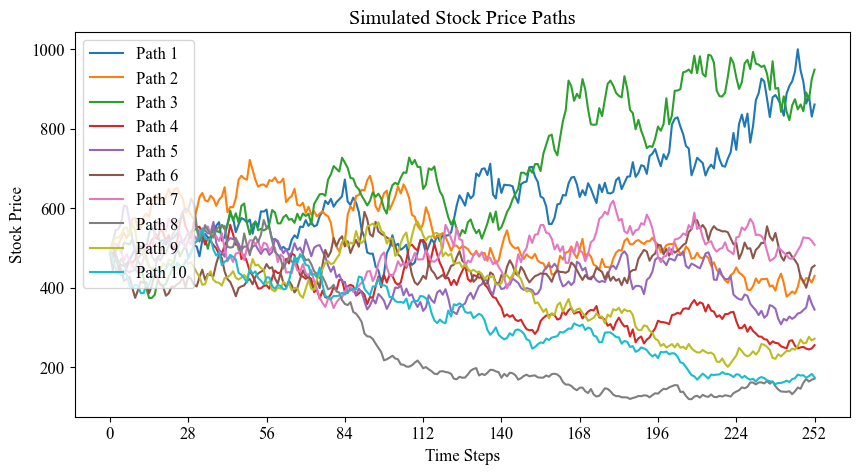

In [7]:
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12

# Plot stock price paths without grid
plt.figure(figsize=(10, 5))
plt.title('Simulated Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
for i in range(m):
    plt.plot(df_St.index, df_St.iloc[:, i], label=f'Path {i+1}')

# Set x-axis ticks to display only 10 values
n_ticks = 10
indices = np.linspace(0, n, n_ticks, dtype=int)
plt.xticks(df_St.index[indices])

plt.legend(loc='upper left')
plt.grid(False)  # Remove grid
plt.show()